----------------
# Bangla License Plate Characters Recognition ([YOLO-V8 Docs](https://docs.ultralytics.com/modes/))
------------------------------

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jun  6 14:49:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mount your Google drive
1.   Click the `Files` Icon -> click `Mount drive` Icon.
2.   Change your working directory to your drive so that all the files will be saved to the drive and not the temporary runtime.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

HOME = "/content/drive/MyDrive/Project_BLPR"

In [ ]:
data_folder = f"{HOME}/data"
try:
    os.mkdir(data_folder)
except FileExistsError:
    pass
os.chdir(HOME)
print(os.getcwd())

/content/drive/MyDrive/Project_BLPR


## Install YOLOv8

In [ ]:
# Pip install method (recommended)
%cd
!pip install ultralytics==8.0.112

from IPython import display
display.clear_output()

In [ ]:
# check if installed correctly
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## General Imports

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

import os
from IPython import display
from IPython.display import Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Downloading our custom dataset from Roboflow in Yolo-V8 format

In [ ]:
DATASET_NAME = "blp_text_v1_yoloV8"
DATASET_DIR = f"{HOME}/data/{DATASET_NAME}"

In [ ]:
try:
    os.mkdir(DATASET_DIR)
except FileExistsError:
    pass

# os.chdir(DATASET_DIR)
# curl -L "https://app.roboflow.com/ds/DyWNA3yDhF?key=X14CoWUGAh"; roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
%cd {HOME}
%pwd

/content/drive/MyDrive/Project_BLPR


'/content/drive/MyDrive/Project_BLPR'

### Setting up project directory structure

In [ ]:
MODEL_PATH = f"{HOME}/yolov8m.pt"
DATA_YAML = f"{DATASET_DIR}/data.yaml"

BLP_Text_Model_Dir = f"{HOME}/model_blp_text_extraction"

PROJECT_NAME = "blp_text_trained_weights"
PROJECT_PATH = f"{BLP_Text_Model_Dir}/{PROJECT_NAME}"

In [ ]:
print("Model Path: ", MODEL_PATH)
print("Data Yaml: ", DATA_YAML)

In [ ]:
%cd {BLP_Text_Model_Dir}

## Training a custom model for bangla character recognition with YOLO-V8

In [ ]:
model = YOLO(MODEL_PATH)

In [ ]:
model.train(
    data=DATA_YAML,
    epochs=75,
    patience=10,
    batch=32,
    imgsz=640,
    workers=16,
    cache=True,
    project=PROJECT_NAME,
    seed=3,
    plots=True,
)

from IPython import display

display.clear_output()

In [ ]:
last_pt = YOLO(f"{PROJECT_PATH}/train/weights/last.pt")

In [ ]:
# last_pt.train(data=DATA_YAML, resume=True, project=PROJECT_NAME, plots=True)
display.clear_output()

In [13]:
!ls {PROJECT_PATH}/train/

F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
args.yaml					  val_batch0_labels.jpg
confusion_matrix.png				  val_batch0_pred.jpg
confusion_matrix_normalized.png			  val_batch1_labels.jpg
events.out.tfevents.1686094655.1ebac0d13476.28.0  val_batch1_pred.jpg
labels.jpg					  val_batch2_labels.jpg
labels_correlogram.jpg				  val_batch2_pred.jpg
results.csv					  weights


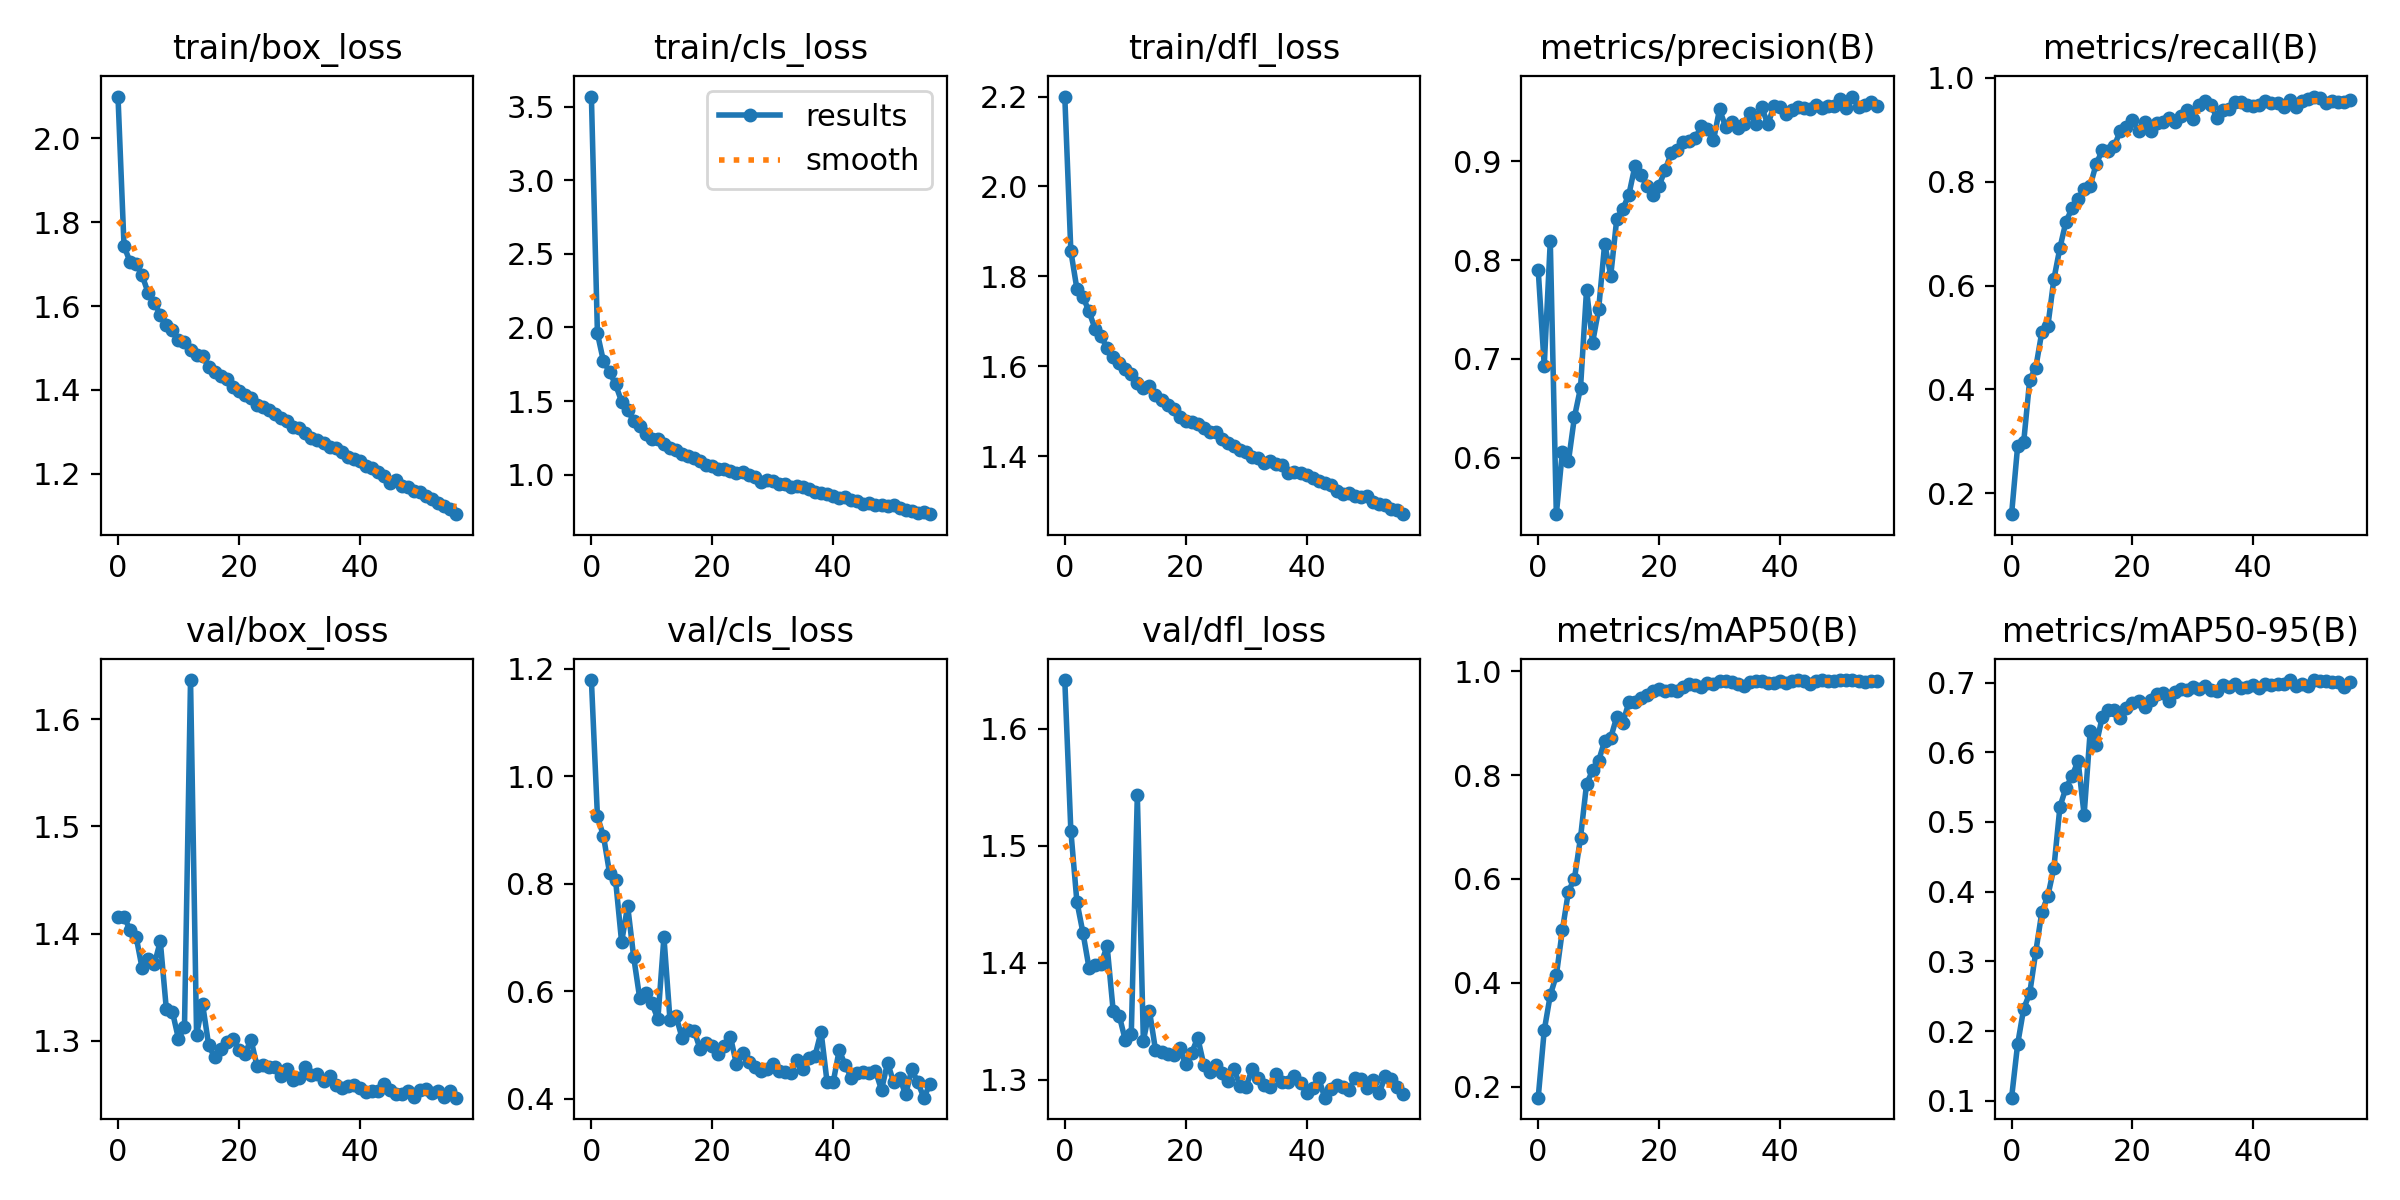

In [14]:
Image(filename=f"{PROJECT_PATH}/train/results.png", width=600)

## Model validation

In [15]:
best_pt = YOLO(f"{PROJECT_PATH}/train/weights/best.pt")

In [ ]:
val_metrics = best_pt.val()

## Testing

In [ ]:
test_metrics = best_pt.val(split="test")